# Introduction

Hello people, welcome to my kernel! Nowadays I've started to learn Deep Learning and now I am learning Artifical Neural Networks. In this kernel I am going to create an ANN model and I am going to use it for classification. I am new in data science, so I might have mistakes, if you see any mistakes and report them I would be happy. 

Let's take a look at our schedule

# Schedule
1. Importing Libraries and Data
1. Data Overview
1. Data Preprocessing
    * Dataset Normalizing
    * Train Test Split
1. Creating ANN Model from Scratch
    * Initializing Parameters
    * Forward Propagation
    * Loss and Cost Functions
    * Backward Propagation
    * Update Parameters
    * Prediction
    * Combining All Functions Into A Function
1. Creating ANN Model Using Keras Library
1. Result
1. Conclusion

# Importing Libraries And Data

In this section I am going to import general libraries that I will use in this kernel. However I am not going to import Deep Learning libraries, I am going to import them when I need them.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

And now I am going to import the data.

In [ ]:
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

# Data Overview

In this section I am going to examine dataset. 

In [ ]:
data.head()

In [ ]:
data.info()

* There are 12 features in our dataset.
* All of the features are numerical
* Our label (y axis) is DEATH_EVENT feature
* There 299 rows in the dataset.

# Data Preprocessing
In this section I am going to prepare dataset for deep learning. In order to do this I am going to follow these two steps

* Dataset Normalizing
* Train Test Split

## Dataset Normalizing

In this sub-section I am going to normalize dataset. In order to do this I am going to use this formula:

**normalized_data = (data - min(data) / (max(data) - min(data))**

In [ ]:
data = (data-np.min(data)) /(np.max(data)-np.min(data))

In [ ]:
data.head()

## Train Test Split

In this section I am going to split dataset into train and test. 

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop("DEATH_EVENT",axis=1)
y = data["DEATH_EVENT"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

y_train = np.array(y_train)
y_test = np.array(y_test)

* And now I am going to take reverse of arrays, I am going to explain why I did this.


In [ ]:
x_train = x_train.T
x_test = x_test.T

y_train = y_train.T
y_test = y_test.T

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Creating ANN Model

In this section I am going to create 2 Layer ANN model. I am going to create two layer ANN because I am a beginner and at least at the beginning I am not going to use any library. I am going to write models myself.

I am going to follow these steps for creating ANN Model:
* Initializing Parameters
* Forward Propagation
* Loss and Cost Functions
* Backward Propagation
* Update Parameters
* Prediction
* Combining All Functions Into A Function


## Initializing Parameters

In this section I am going to write a function that helps us to initalize parameters. 

In [ ]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

* Why I've used 3: There is a hyperparameter in ANN called node number. And for this kernel I've chosen 3 for node number

*If you want to see detailed description you can check this kernel, English is not my native language and I am a beginner in Deep Learning so, I could not describe node number enough*

https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Overview-the-Data-Set


## Forward Propagation

In this section I am going to define a forward propagation function. In order to do this I am going to use classical formula.

Z = W*a + B 
A = tanh(Z)

In my logistic regression kernel, I had used sigmoid function and I had to define it from scratch because there is no function for sigmoid. But in tanh activation function there is a numpy method. So we can use it. However we need sigmoid again, so I am going to define it

*You can check my logistic regression scratch kernel*

https://www.kaggle.com/mehmetlaudatekman/death-prediction-using-heart-failure-data

The formula of tanh is:
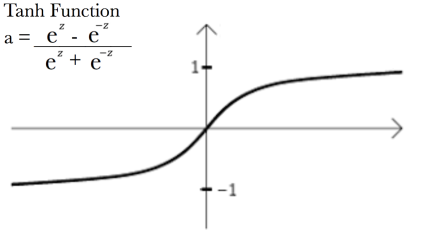

Let's implement forward propagation in python

In [ ]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


* And now I am going to define forward propagation

In [ ]:
def forward_propagation(x_train,parameters):
    
    Z1 = np.dot(parameters["weight1"],x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    
    cache = {"Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2 }
    
    return A2,cache


## Cost Function
In this section I am going to define the cost function. In deep learning we use cost, The model improves as the cost decreases.

There is a cost formula:
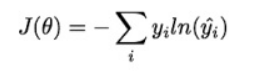

Let's implement in python

In [ ]:
def cost_func(A2,Y,parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

## Backward Propagation

Finally we came most confused section. I am not going to tell anything about this because backward propagation is only about the derivate, and it is confusing. If you want to learn details about backward propagation you can check youtube. 

In [ ]:
def backward_propagation(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

* I took this code from my teacher's kernel, you can check this kernel, I am sure you will love that.

*https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners*

## Updating Function

In this section I am goiing to define updating function, we will use our gradients for updating weights and bias. 

There is a formula about updating

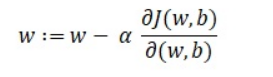

In [ ]:
def updating(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

## Prediction Function

Our main functions are ready, but still we need a prediction function for using our trained model. So I am going to create a prediction function.

In [ ]:
def prediction(parameters,x_test):
    A2, cache = forward_propagation(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Combining All Functions Into A Function

Our all functions are ready, and now I am going to combine them into a function.

In [ ]:
def ann_2layer(x_train,y_train,x_test,y_test,num_of_iter=2500):
    cost_list = []
    iter_list = []
 
    parameters = initialize_parameters_and_layer_sizes_NN(x_train,y_train)
    
    for i in range(0,num_of_iter):
        
        A2,cache = forward_propagation(x_train,parameters) # Forward Propagation
        
        cost = cost_func(A2,y_train,parameters) # Cost Function
        
        grads = backward_propagation(parameters,cache,x_train,y_train) # Backward Propagation
        
        parameters = updating(parameters,grads) # Updating Parameters
        
        if i%100 == 0:
            cost_list.append(cost)
            iter_list.append(i)
            print("Cost after iteration {} : {}".format(i,cost))
        
    
    """
    Cost Value Visualization
    """
    fig,ax = plt.subplots(figsize=(8,6))
    plt.plot(iter_list,cost_list)
    plt.xticks(iter_list,rotation=90)
    plt.xlabel("Number Of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    
    y_prediction_test = prediction(parameters,x_test)
    y_prediction_train = prediction(parameters,x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    
    return parameters





Our function is ready! Let's test it with our dataset.

In [ ]:
parameters = ann_2layer(x_train,y_train,x_test,y_test,2500)

Our train score is %70

Our test score is %55

# Creating ANN Model Using Keras Library

In this section I am going to create an ANN model using Keras library. I am going to use Keras library because it eases our job. 

I am going to start with taking transposes of arrays. I am going do this because at the beginning of this kernel we've taken transposes arrays for matrix product. Now I am going to fix it.

In [ ]:
x_train,x_test = x_train.T,x_test.T

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=16,kernel_initializer="uniform",activation="tanh",input_dim=x_train.shape[1]))
    classifier.add(Dense(units=8,kernel_initializer="uniform",activation="tanh"))
    classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
    classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier,epochs=100)
accuracies = cross_val_score(estimator=classifier,X = x_train , y = y_train , cv=3)

print("Mean of CV Scores is ",accuracies.mean())
print("Std of CV Scores is",accuracies.std())

* Our mean of CV scores is %82 
* Our variance of CV scores is 0.04

And now I am going to compute accuracy score. In order to do this I am going to start with fit my data to my model.

In [ ]:
classifier.fit(x_train,y_train)
y_head = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score # I am in love with scikit learn <3

In [ ]:
print("Accuracy of model is: ",accuracy_score(y_test,y_head))

# Result

At the beginning of this kernel we created our ANN model from scratch our score was %70 and it is a bit low. But at the end of this kernel we created our ANN model using keras and our score was %71. 

So we can create ANN models from scratch for understand the logic behind ANN. But we should use Keras library for creating ANN models, because it is easier and better than our models.

# Conclusion
Thanks for your attention, I am a beginner in deep learning and this was my first kernel in deep learning, so I might have mistakes (almost definitely). If you contact with me for mistakes, I would be glad

If you can question in your mind, you can ask me, I am going to answer them as much as I can.
